In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import scipy
from scipy import stats
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [4]:
dataFrame = pd.read_csv('https://raw.githubusercontent.com/priyadarshi0007/ASTCapstone/master/AppointmentData.csv')

In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110388 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110408 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110507 non-null float64
Hipertension      110506 non-null float64
Diabetes          110527 non-null int64
Alcoholism        110505 non-null float64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           107751 non-null object
dtypes: float64(5), int64(4), object(5)
memory usage: 11.8+ MB


In [8]:
#Renaming The Columns

dataFrame.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap','No-show':'NoShow'}, inplace = True)

In [9]:
dataFrame.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0,0.0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0,0.0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0,0.0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0,0.0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1,0.0,0,0,No


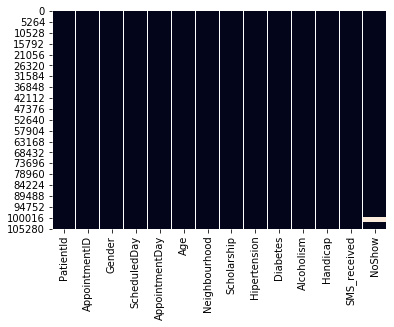

In [10]:
sns.heatmap(dataFrame.isnull(), cbar=False)

In [13]:
# Unique values in each column of dataframe
uniqueValues = dataFrame.nunique() 
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  110
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
NoShow                 2
dtype: int64


In [45]:
dataFrame['Handicap'].unique()

array([0, 1, 2, 3, 4])

In [46]:
dataFrame.isnull().sum().sum()

3097

In [47]:
dataFrame = dataFrame.dropna()

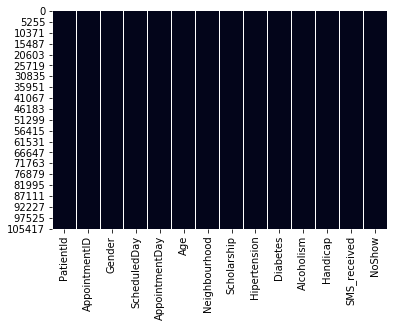

In [48]:
sns.heatmap(dataFrame.isnull(), cbar=False)

In [49]:
dataFrame.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age               float64
Neighbourhood      object
Scholarship       float64
Hipertension      float64
Diabetes            int64
Alcoholism        float64
Handicap            int64
SMS_received        int64
NoShow             object
dtype: object

In [60]:
import datetime
from datetime import datetime
#Changing the ScheduledDay/AppointmentDay to date and time
dataFrame['ScheduledDay'] = pd.to_datetime(dataFrame['ScheduledDay'])
dataFrame['AppointmentDay'] = pd.to_datetime(dataFrame['AppointmentDay'])

In [61]:
dataFrame['ScheduledDay_year'] = dataFrame['ScheduledDay'].dt.year
dataFrame['ScheduledDay_month'] = dataFrame['ScheduledDay'].dt.month
dataFrame['ScheduledDay_quarter'] = dataFrame['ScheduledDay'].dt.quarter
dataFrame['ScheduledDay_day'] = dataFrame['ScheduledDay'].dt.day
dataFrame['ScheduledDay_hour'] = dataFrame['ScheduledDay'].dt.hour # this only give numer
dataFrame['ScheduledDay_dayOfTheWeek'] = dataFrame['ScheduledDay'].dt.weekday_name

In [62]:
dataFrame['AppointmentDay_year'] = dataFrame['AppointmentDay'].dt.year
dataFrame['AppointmentDay_month'] = dataFrame['AppointmentDay'].dt.month
dataFrame['AppointmentDay_quarter'] = dataFrame['AppointmentDay'].dt.quarter
dataFrame['AppointmentDay_day'] = dataFrame['AppointmentDay'].dt.day
dataFrame['AppointmentDay_hour'] = dataFrame['AppointmentDay'].dt.hour # this only give numer
dataFrame['AppointmentDay_dayOfTheWeek'] = dataFrame['AppointmentDay'].dt.weekday_name

In [63]:
dataFrame['difference'] = abs(dataFrame['AppointmentDay']- dataFrame['ScheduledDay'])
dataFrame['difference'] = np.floor(dataFrame['difference'].apply(lambda x: x.total_seconds() / (3600 * 24)))

In [67]:
dataFrame.dtypes

PatientId                                  float64
AppointmentID                                int64
Gender                                      object
ScheduledDay                   datetime64[ns, UTC]
AppointmentDay                 datetime64[ns, UTC]
Age                                        float64
Neighbourhood                               object
Scholarship                                float64
Hipertension                               float64
Diabetes                                     int64
Alcoholism                                 float64
Handicap                                     int64
SMS_received                                 int64
NoShow                                      object
ScheduledDay_year                            int64
ScheduledDay_month                           int64
ScheduledDay_quarter                         int64
ScheduledDay_day                             int64
ScheduledDay_hour                            int64
ScheduledDay_dayOfTheWeek      

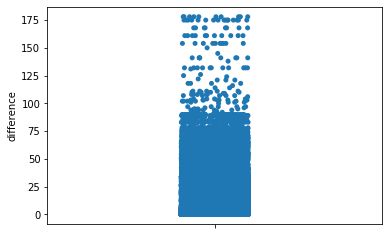

In [68]:
sns.stripplot(data = dataFrame, y = 'difference', jitter = True)

In [69]:
#dataFrame.columns[dataFrame.isnull().any()]
#np.where(pd.isnull(dataFrame))
#dataFrame['NoShow'].isnull() == True

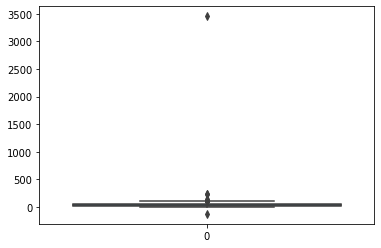

In [70]:
sns.boxplot(data=dataFrame['Age'])

In [71]:
dataFrame =dataFrame[(dataFrame.Age >= 0) & (dataFrame.Age<= 110)]

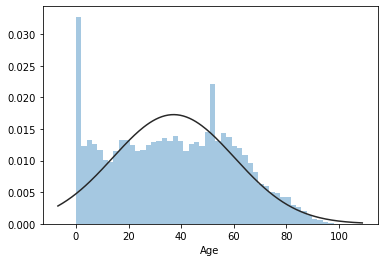

In [72]:
sns.distplot(dataFrame['Age'], kde=False, fit=stats.norm);

# EDA

In [130]:
# countGender = pd.value_counts(dataFrame['Gender'],sort = True)
# countGender.plot(kind = 'bar', rot = 0)
# plt.title('Male & Female number')
# plt.xlabel("Gender")
# plt.ylabel("Frequency")

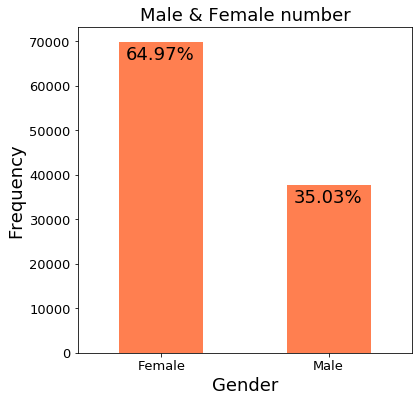

In [129]:
ax = dataFrame['Gender'].value_counts().plot(kind='bar', figsize=(6,6),
                                                  color="coral", fontsize=13);
ax.set_alpha(0.20)
ax.set_title("Male & Female number", fontsize=18)
ax.set_xlabel("Gender", fontsize=18);
ax.set_ylabel("Frequency", fontsize=18)
ax.set_xticklabels(["Female", "Male"],rotation = 0);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-3900, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=18,
                color='black')


In [131]:
#df = pd.DataFrame(data={"age": randint(10, 50, 1000),
 #                   "response": [choice(['Yes', 'No']) for i in range(1000)]})

dataFrame['age_group'] = pd.cut(dataFrame.Age, bins=[g for g in range(0, 110, 10)], include_lowest=True)
dataFrame.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_hour,ScheduledDay_dayOfTheWeek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_quarter,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_dayOfTheWeek,difference,age_group
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0,...,18,Friday,2016,4,2,29,0,Friday,0.0,"(60.0, 70.0]"
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0,...,16,Friday,2016,4,2,29,0,Friday,0.0,"(50.0, 60.0]"
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0,...,16,Friday,2016,4,2,29,0,Friday,0.0,"(60.0, 70.0]"
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0,...,17,Friday,2016,4,2,29,0,Friday,0.0,"(-0.001, 10.0]"
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1,...,16,Friday,2016,4,2,29,0,Friday,0.0,"(50.0, 60.0]"


In [134]:
# Unique values in each column of dataframe
uniqueValues = dataFrame.nunique() 
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
PatientId                        6045
AppointmentID                  107419
Gender                              2
ScheduledDay                   100758
AppointmentDay                     27
Age                               102
Neighbourhood                      81
Scholarship                         2
Hipertension                        2
Diabetes                            2
Alcoholism                          2
Handicap                            5
SMS_received                        2
NoShow                              2
ScheduledDay_year                   2
ScheduledDay_month                  8
ScheduledDay_quarter                3
ScheduledDay_day                   31
ScheduledDay_hour                  16
ScheduledDay_dayOfTheWeek           6
AppointmentDay_year                 1
AppointmentDay_month                3
AppointmentDay_quarter              1
AppointmentDay_day                 24
AppointmentDay_hour                 1
Appointmen

In [178]:
dataFrame['Hipertension'].unique()

array([1., 0.])

In [229]:
dataFrame.groupby(['NoShow'])[['Hipertension']].count()


,Hipertension
NoShow,
No,85722
Yes,21697


In [230]:
dataFrame.groupby(['NoShow'])[['Diabetes']].count()

,Diabetes
NoShow,
No,85722
Yes,21697


In [214]:
h0 = dataFrame[dataFrame['Hipertension'] == 0.].groupby(['NoShow'])[['Hipertension']].count()
h0
h1 = dataFrame[dataFrame['Hipertension'] == 1.].groupby(['NoShow'])[['Hipertension']].count()
h1

,Hipertension
NoShow,
No,17500
Yes,3674


In [215]:
d0 = dataFrame[dataFrame['Diabetes'] == 0].groupby(['NoShow'])[['Diabetes']].count()
d0
d1 = dataFrame[dataFrame['Diabetes'] == 1].groupby(['NoShow'])[['Diabetes']].count()
d1

,Diabetes
NoShow,
No,6320
Yes,1391


In [246]:
a0 = dataFrame[dataFrame['Alcoholism'] == 0].groupby(['NoShow'])[['Alcoholism']].count()
a0
a1 = dataFrame[dataFrame['Alcoholism'] == 1].groupby(['NoShow'])[['Alcoholism']].count()
a1

,Alcoholism
NoShow,
No,2619
Yes,653


In [263]:
# concatenating the columns
resulthda0 = pd.concat([h0, d0, a0], axis=1, sort=False)
resulthda0

,Hipertension,Diabetes,Alcoholism
NoShow,,,
No,68222,79402,83103
Yes,18023,20306,21044


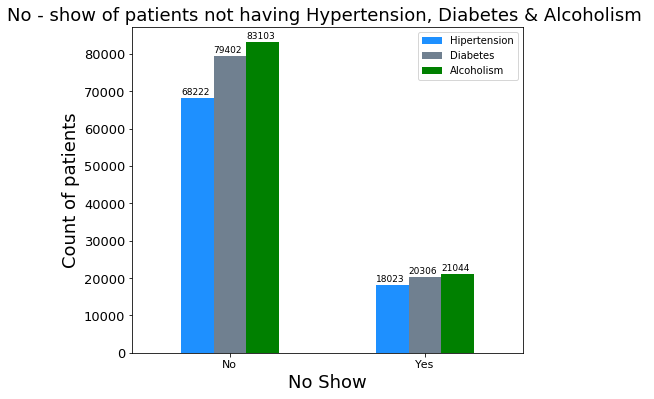

In [267]:
ax = resulthda0[['Hipertension','Diabetes', 'Alcoholism']].plot(kind='bar',
              figsize=(7,6), color=['dodgerblue', 'slategray', 'green'], fontsize=13);

ax.set_alpha(0.8)
ax.set_title("No - show of patients not having Hypertension, Diabetes & Alcoholism ",
fontsize=18)
ax.set_xlabel("No Show", fontsize=18)
ax.set_ylabel("Count of patients", fontsize=18);
ax.set_xticklabels(['No', "Yes"], rotation=0, fontsize=11)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.0, i.get_height()+1000, \
            str(round((i.get_height()), 2)), fontsize=9, color='black',
                rotation=0)

In [264]:
# concatenating the columns
resulthda1 = pd.concat([h1, d1, a1], axis=1, sort=False)
resulthda1

,Hipertension,Diabetes,Alcoholism
NoShow,,,
No,17500,6320,2619
Yes,3674,1391,653


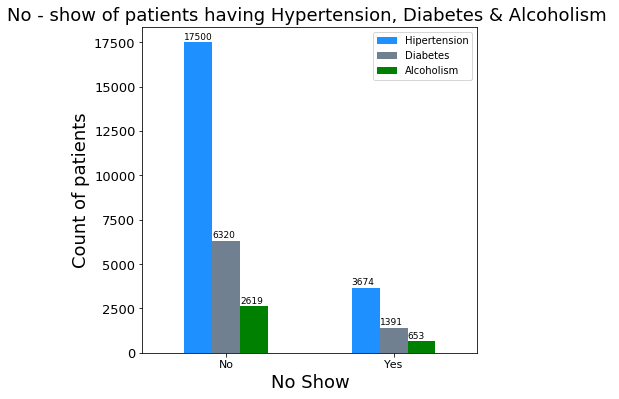

In [268]:
# Plotting the graph w

ax = resulthda1[['Hipertension','Diabetes', 'Alcoholism']].plot(kind='bar',
              figsize=(6,6), color=['dodgerblue', 'slategray', 'green'], fontsize=13);

ax.set_alpha(0.8)
ax.set_title("No - show of patients having Hypertension, Diabetes & Alcoholism ",
fontsize=18)
ax.set_xlabel("No Show", fontsize=18)
ax.set_ylabel("Count of patients", fontsize=18);
ax.set_xticklabels(['No', "Yes"], rotation=0, fontsize=11)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.0, i.get_height()+180, \
            str(round((i.get_height()), 2)), fontsize=9, color='black',
                rotation=0)

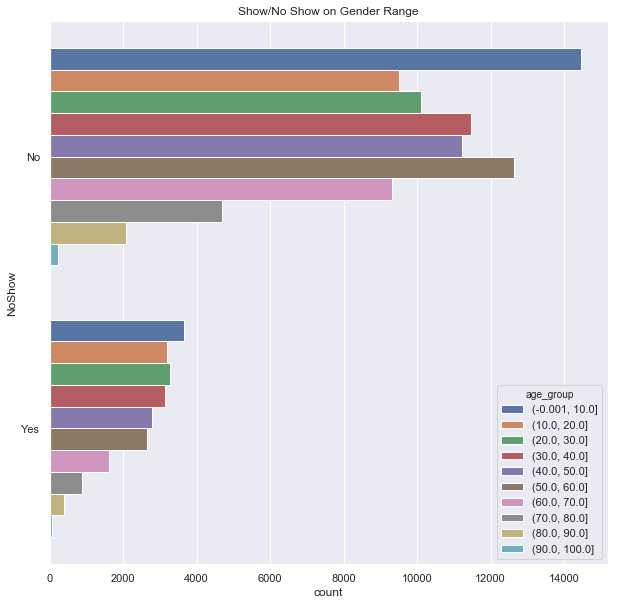

In [22]:
plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
sns.countplot(  y = 'NoShow',
              data=dataFrame, 
              order = dataFrame['NoShow'].value_counts().index,
              hue='age_group').set_title('Show/No Show on Gender Range') #palette="Greens_d")
#plt.title('Show/No Show on Gender Range')
plt.show()

Text(0.5, 1.0, 'Show/No Show on Gender Range')

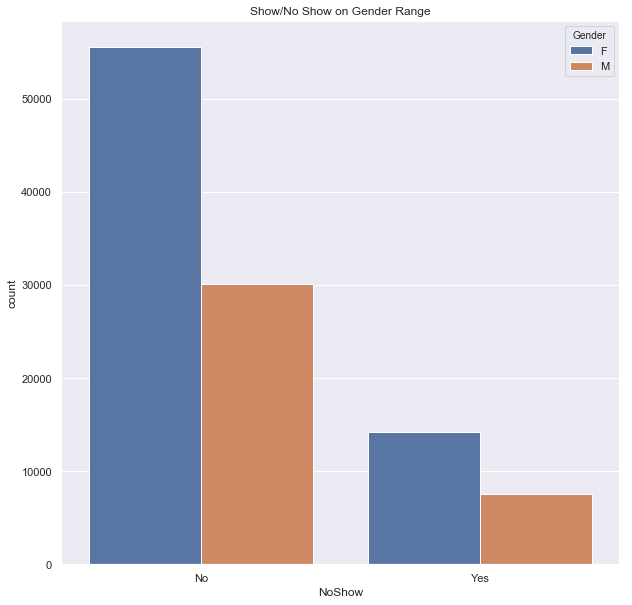

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(  x = 'NoShow',
              data=dataFrame, 
              order = dataFrame['NoShow'].value_counts().index,
              hue='Gender').set_title('Show/No Show on Gender Range')

Text(0.5, 1.0, 'Show/No Show on Gender Range')

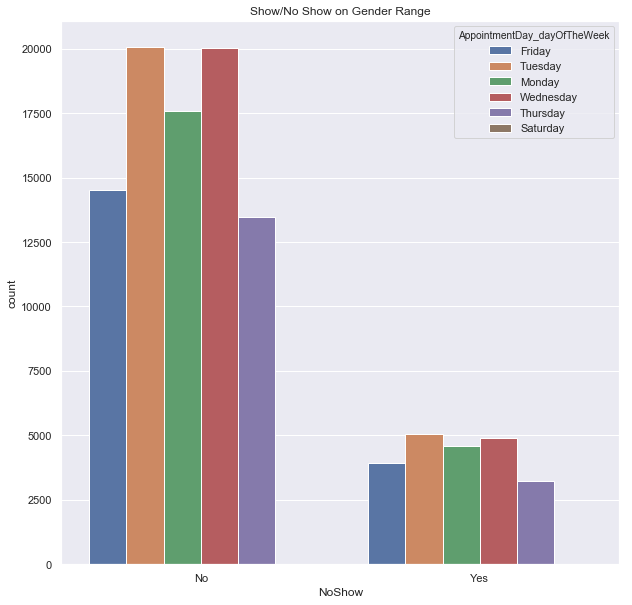

In [24]:
plt.figure(figsize=(10, 10))
sns.countplot( x = 'NoShow',
              data=dataFrame, 
              order = dataFrame['NoShow'].value_counts().index,
              hue='AppointmentDay_dayOfTheWeek').set_title('Show/No Show on Gender Range') 

In [25]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107419 entries, 0 to 110526
Data columns (total 28 columns):
PatientId                      107419 non-null float64
AppointmentID                  107419 non-null int64
Gender                         107419 non-null object
ScheduledDay                   107419 non-null datetime64[ns, UTC]
AppointmentDay                 107419 non-null datetime64[ns, UTC]
Age                            107419 non-null float64
Neighbourhood                  107419 non-null object
Scholarship                    107419 non-null float64
Hipertension                   107419 non-null float64
Diabetes                       107419 non-null int64
Alcoholism                     107419 non-null float64
Handicap                       107419 non-null int64
SMS_received                   107419 non-null int64
NoShow                         107419 non-null object
ScheduledDay_year              107419 non-null int64
ScheduledDay_month             107419 non-null int64


# Data Pre-Processing


In [26]:
dataFrame['ScheduledDay_dayOfTheWeek'] = dataFrame['ScheduledDay'].dt.weekday
dataFrame['AppointmentDay_dayOfTheWeek'] = dataFrame['AppointmentDay'].dt.weekday

In [27]:
dataFrame['Gender'].replace(0, 'F',inplace=True)
dataFrame['Gender'].replace(1, 'M',inplace=True)

In [28]:
#Not working for OBJECT TYPE
#dataFrame['NoShow']= dataFrame['NoShow'].replace(1, 'Yes',inplace=True)
#dataFrame['NoShow']= dataFrame['NoShow'].replace(0, 'No',inplace=True)

In [29]:
dataFrame.NoShow = dataFrame.NoShow.apply(lambda x: 1 if x == 'Yes' else 0)

In [30]:
dataFrame['NoShow'].head(n=10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: NoShow, dtype: int64

In [31]:
#We need to handle the Object data type to fit for the model
dataFrame = dataFrame.drop(columns=['PatientId',
                                    'ScheduledDay',
                                    'AppointmentDay',
                                    'AppointmentID',
                                    'AppointmentDay_quarter',
                                    'AppointmentDay_year',
                                    'AppointmentDay_hour'
                                   ])


# Predictions

In [32]:
dataFrame.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledDay_year,ScheduledDay_month,ScheduledDay_quarter,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_dayOfTheWeek,AppointmentDay_month,AppointmentDay_day,AppointmentDay_dayOfTheWeek,difference
Age,1.000000,-0.093227,0.503713,0.291766,0.096340,0.077414,0.016309,-0.060382,-0.027108,-0.001729,-0.030102,-0.011260,0.015856,0.012897,0.019381,-0.008969,0.002942,0.035488
Scholarship,-0.093227,1.000000,-0.019503,-0.024736,0.033560,-0.008097,0.000008,0.028766,0.001405,0.017507,0.026272,0.007887,-0.025203,-0.005151,-0.003811,0.002939,-0.000880,-0.031892
Hipertension,0.503713,-0.019503,1.000000,0.432791,0.089741,0.080089,-0.004690,-0.035136,-0.035834,0.025361,0.015137,-0.000077,-0.032181,0.002254,0.004061,-0.007792,0.003023,-0.017521
Diabetes,0.291766,-0.024736,0.432791,1.000000,0.019962,0.057429,-0.012861,-0.014957,-0.006831,0.025565,0.010215,-0.007344,-0.013525,0.000894,0.004025,-0.004249,0.006445,-0.027259
Alcoholism,0.096340,0.033560,0.089741,0.019962,1.000000,0.005166,-0.025527,-0.001065,0.004260,0.029696,0.018105,-0.004155,-0.002749,0.005611,0.003996,-0.002431,0.002584,-0.038840
Handicap,0.077414,-0.008097,0.080089,0.057429,0.005166,1.000000,-0.023377,-0.006258,-0.006305,0.014325,0.006660,-0.000692,0.001900,0.001766,-0.001195,-0.003020,0.005048,-0.018740
SMS_received,0.016309,0.000008,-0.004690,-0.012861,-0.025527,-0.023377,1.000000,0.125181,-0.019424,-0.298938,-0.116704,0.170692,0.062529,0.077293,0.100329,-0.044028,-0.091524,0.385600
NoShow,-0.060382,0.028766,-0.035136,-0.014957,-0.001065,-0.006258,0.125181,1.000000,-0.006253,-0.161392,-0.058000,0.043557,0.061414,0.006446,-0.022817,0.004114,0.001252,0.179568
ScheduledDay_year,-0.027108,0.001405,-0.035834,-0.006831,0.004260,-0.006305,-0.019424,-0.006253,1.000000,-0.242496,-0.252237,0.013221,-0.008394,0.018743,-0.011153,0.006643,-0.007653,-0.247723
ScheduledDay_month,-0.001729,0.017507,0.025361,0.025565,0.029696,0.014325,-0.298938,-0.161392,-0.242496,1.000000,0.566707,-0.440668,-0.061454,-0.034165,0.519533,-0.132150,-0.040330,-0.599609


In [33]:
x = dataFrame[['Age','Scholarship','Hipertension','Diabetes','Alcoholism',
               'Handicap','SMS_received','ScheduledDay_year','ScheduledDay_month','ScheduledDay_quarter',
               'ScheduledDay_day','ScheduledDay_hour','ScheduledDay_dayOfTheWeek','AppointmentDay_month',
               'AppointmentDay_day','AppointmentDay_dayOfTheWeek','difference'
              ]]
y = dataFrame ['NoShow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75193, 17)
(75193,)
(32226, 17)
(32226,)


In [43]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=10, n_jobs=-1,max_depth=10)

# Train the classifier
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [44]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(x_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.8009681623533793

In [36]:
for feature in zip(x, clf.feature_importances_):
    print(feature)

('Age', 0.06838523797179415)
('Scholarship', 0.004741698559409668)
('Hipertension', 0.0065318410619888126)
('Diabetes', 0.00045945215813830833)
('Alcoholism', 0.001043969878753715)
('Handicap', 0.0004433091613471575)
('SMS_received', 0.09645075108865876)
('ScheduledDay_year', 9.855816631808708e-05)
('ScheduledDay_month', 0.18464752653953329)
('ScheduledDay_quarter', 0.013377980541988396)
('ScheduledDay_day', 0.01993995302699657)
('ScheduledDay_hour', 0.01899365799842337)
('ScheduledDay_dayOfTheWeek', 0.004346012249577432)
('AppointmentDay_month', 0.009314495516152226)
('AppointmentDay_day', 0.020767722563550958)
('AppointmentDay_dayOfTheWeek', 0.003813161953629136)
('difference', 0.5466446715637399)


In [37]:
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.15)

In [42]:
#for feature_list_index in sfm.get_support(indices=True):
#    print(x[feature_list_index])

In [38]:
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

In [39]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=10, n_jobs=-1,max_depth=10)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [40]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.800688884751443

# PCA analysis

<b>When should I use PCA?</b>

    1.Do you want to reduce the number of variables, but aren’t able to identify variables to completely 
    remove from   consideration?
    2.Do you want to ensure your variables are independent of one another?
    3.Are you comfortable making your independent variables less interpretable?
    
<b>PCA is a method that brings together </b>

    1.A measure of how each variable is associated with one another. (Covariance matrix.)
    2.The directions in which our data are dispersed. (Eigenvectors.)
    3.The relative importance of these different directions. (Eigenvalues.)

<b>PCA combines our predictors and allows us to drop the eigenvectors that are relatively unimportant</b>


In [53]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 6) 
  
X_train_Pca = pca.fit_transform(x_train) 
X_test_Pca = pca.transform(x_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [60]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=10, n_jobs=-1,max_depth=10)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_train_Pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [ ]:
y_pred = clf_important.predict(X_test_Pca)

In [52]:
accuracy_score(y_test, y_pred)

0.8016818717805498

In [61]:
!pip install xgboost 

In [62]:
import xgboost as xgb

In [68]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.800688884751443